In [1]:
import scineo as sn
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
train,train_y,test,test_y = np.load("DataSet/No4.npy")

In [3]:

train_x,test_x = train.reshape(-1,128*128),test.reshape(-1,128*128)
X = np.concatenate([train_x,test_x])
key = list(map(lambda x:x*0.04, range(1,25)))

In [ ]:
start = time.time()
l_1 = []
for i in range(3,46):
    mat = sn.pca(X,n_components=i)
    train_x,test_x = mat[:len(train_y)],mat[len(train_y):]
    detail = mat.shape[1]
    l_2 = []
    for j in range(1,31):
        print("")
        print("pca = %.2f\tdetail = %d\tK = %d\t"%(i,detail,j))
        ac = sn.predict_knn(train_x,train_y,test_x,test_y,neighbors=j,show=True)
        l_2.append(ac)
    l_1.append(l_2)
print("\ntiem = %.2fS"%(time.time() - start))

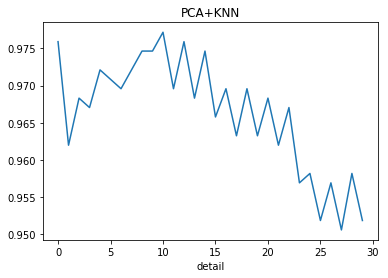

In [13]:
plt.plot(l[13])
plt.title("PCA+KNN")
plt.xlabel("detail")
plt.show()

In [ ]:
pk = pd.DataFrame(l_1)
pk.columns = list(range(1,31))
pk.index = list(range(3,46))
#pk.to_csv("DataSet/pac_knn.csv")
print("训练样本数:%d\t测试样本数:%d"%(len(train_x),len(test_y)))
print("最大识别率:%.2f%%"%(pk.max().max()*100))
print("横坐标为KNN参数, 纵坐标为PCA提起的特征维数")
print(pk)


In [26]:
pk.values == pk.max().max()


numpy.ndarray

In [29]:
def show_max(mat):
	for i in mat.columns:
		for j in mat.index:
			if mat[i][j] == mat.max().max():
				print("n = %s\tk = %s\t有最大识别率:%.2f%%"%(j,i,mat.max().max()*100))

In [30]:
show_max(pk)

n = 13	k = 5	有最大识别率:99.24%
